In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [3]:
df=pd.read_csv('./datos/total_time_series.csv')

# Ya se ha hecho anteriormente dos modelos, regresion lineal y regresion polinómica. La regresión polinómica descartada por los malos resultados. 
# La regresión lineal ha estado bien, siempre y cuando se pida predicción de valores dentro de una lógica
 
# Vamos a trabajar con timeseries 

In [4]:
df.columns

Index(['Unnamed: 0', 'Year', 'Wind (% electricity)', 'Solar (% electricity)',
       '% coches'],
      dtype='object')

In [5]:
df = pd.read_csv('./datos/total_time_series.csv', parse_dates=['Year'], index_col='Year')

# Draw Plot
'''def plot_df(df, x, y, title="", xlabel='Year', ylabel='Wind (% electricity)', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df['Wind (% electricity)'], title='Evolución eolica') '''
df

,Unnamed: 0,Wind (% electricity),Solar (% electricity),% coches
Year,,,,
1990-01-01 00:00:00,0,0.033880,0.000506,0.0
1990-02-01,1,0.034548,0.000512,0.0
1990-03-01,2,0.035216,0.000518,0.0
1990-04-01,3,0.035884,0.000525,0.0
1990-05-01,4,0.036552,0.000531,0.0
...,...,...,...,...
2022-08-01,391,15.010179,7.267374,21.0
2022-09-01,392,15.010179,7.267374,21.0
2022-10-01,393,15.010179,7.267374,21.0


In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

'''# Import Data
df = pd.read_csv('./datos/total_time_series.csv', parse_dates=['Year'], index_col='Year')

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['Wind (% electricity)'], model = 'multiplicative')#, extrapolate_trend = 'freq')

# Additive Decomposition
result_add = seasonal_decompose(df['Wind (% electricity)'], model = 'additive')#, extrapolate_trend = 'freq')

# Plot
plt.rcParams.update({'figure.figsize': (6,6)})
result_mul.plot();'''
## DA ERROR

"# Import Data\ndf = pd.read_csv('./datos/total_time_series.csv', parse_dates=['Year'], index_col='Year')\n\n# Multiplicative Decomposition \nresult_mul = seasonal_decompose(df['Wind (% electricity)'], model = 'multiplicative')#, extrapolate_trend = 'freq')\n\n# Additive Decomposition\nresult_add = seasonal_decompose(df['Wind (% electricity)'], model = 'additive')#, extrapolate_trend = 'freq')\n\n# Plot\nplt.rcParams.update({'figure.figsize': (6,6)})\nresult_mul.plot();"

In [7]:
# librerias
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

from pmdarima.arima import auto_arima
from pmdarima.arima import ARIMA

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

### PONEMOS EL DATAFRAME AJUSTADO Y CON EL DATE DE INDEX


In [ ]:
#pruebas=pd.read_csv('./datos/total_fecha')

In [8]:
df = pd.read_csv('./datos/total_time_series.csv', parse_dates=['Year'], index_col='Year')
df=df.drop('Unnamed: 0',axis=1)
df['Renovables']=df['Wind (% electricity)']+df['Solar (% electricity)']


In [9]:
df

,Wind (% electricity),Solar (% electricity),% coches,Renovables
Year,,,,
1990-01-01 00:00:00,0.033880,0.000506,0.0,0.034386
1990-02-01,0.034548,0.000512,0.0,0.035061
1990-03-01,0.035216,0.000518,0.0,0.035735
1990-04-01,0.035884,0.000525,0.0,0.036409
1990-05-01,0.036552,0.000531,0.0,0.037084
...,...,...,...,...
2022-08-01,15.010179,7.267374,21.0,22.277553
2022-09-01,15.010179,7.267374,21.0,22.277553
2022-10-01,15.010179,7.267374,21.0,22.277553


comprobamos si es estacionaria

In [10]:
from statsmodels.tsa.stattools import adfuller, kpss

result = adfuller(df['Renovables'].values)
result[1]

0.9988772133629019

In [26]:
#X

In [22]:
X = df[['Renovables']].values
display(len(X))
train = X[:316]
test = X[316:]

396

In [31]:
import matplotlib.pyplot as plt

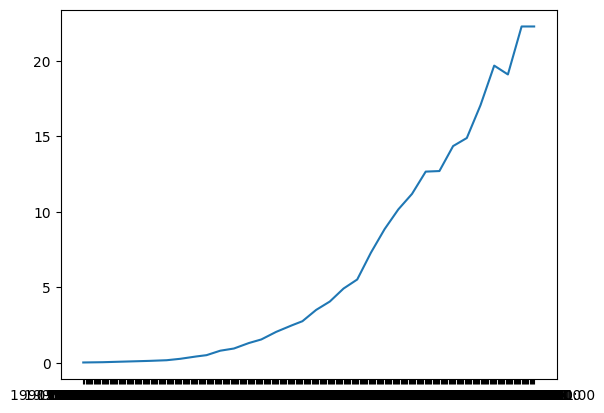

In [35]:

plt.plot(df.index, df['Renovables'])

In [36]:
#X

## si hay que hacer separado sumo wind y solar en una columna y dejo dos columans y hago en dos columnas paralelas

In [24]:
from pmdarima.arima import auto_arima

#### EL AUTOARIMA SIEMPRE PARA OBTENER LOS PARAMETROS OPTIMOS PARA EL MODELO ARIMA 


###  SIEMPRE

model = auto_arima(train,
                   start_p = 1,
                   start_q = 1,
                   max_p = 5,
                   max_q = 5,
                   max_d = 3,
                   stationary=True,  ##### siempre trabajan con stacinary true sino da mal
                   trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1221.472, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1786.558, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1959.700, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1391.906, Time=0.42 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1205.652, Time=0.50 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1533.955, Time=0.47 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1411.973, Time=0.64 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-1628.795, Time=0.63 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=-1539.723, Time

In [25]:
len(test)

80

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
model_ar = ARIMA(order=(1,0,5)) ### arima p d q     PONEMOS LOS VALORES DEL AUTOARIMA
model_ar.fit(train)
predictions = model_ar.predict(80) ### en predict hay que poner los números faltantes...los del test
print("root_mean_squared_error:", np.sqrt(mean_squared_error(test, predictions)))
predictions

root_mean_squared_error: 6.731768393663447


array([13.21013228, 13.2364935 , 13.23146125, 13.18125798, 13.15444331,
       13.12695502, 13.09956697, 13.0722788 , 13.04509014, 13.01800063,
       12.99100991, 12.96411762, 12.9373234 , 12.91062688, 12.88402773,
       12.85752557, 12.83112006, 12.80481084, 12.77859757, 12.75247988,
       12.72645745, 12.70052991, 12.67469692, 12.64895813, 12.62331321,
       12.59776181, 12.57230359, 12.54693821, 12.52166533, 12.49648461,
       12.47139572, 12.44639832, 12.42149208, 12.39667667, 12.37195175,
       12.347317  , 12.32277208, 12.29831667, 12.27395045, 12.24967308,
       12.22548425, 12.20138362, 12.17737089, 12.15344572, 12.1296078 ,
       12.10585681, 12.08219244, 12.05861436, 12.03512226, 12.01171584,
       11.98839477, 11.96515875, 11.94200746, 11.9189406 , 11.89595786,
       11.87305893, 11.85024351, 11.82751129, 11.80486196, 11.78229524,
       11.7598108 , 11.73740837, 11.71508763, 11.69284828, 11.67069004,
       11.6486126 , 11.62661567, 11.60469896, 11.58286218, 11.56

In [28]:
valor_predicho = model_ar.predict(start='2040-01-01', end='2041-12-01')

In [29]:
valor_predicho

array([13.21013228, 13.2364935 , 13.23146125, 13.18125798, 13.15444331,
       13.12695502, 13.09956697, 13.0722788 , 13.04509014, 13.01800063])

In [37]:
type(test)

pandas.core.series.Series

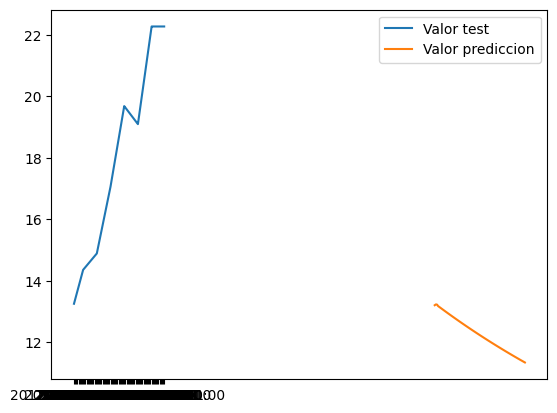

In [21]:
plt.plot(test, label='Valor test')
plt.plot(predictions, label='Valor prediccion')
plt.legend()
plt.show()

In [19]:
df['value_log'] = np.log(df['Renovables'])


In [20]:
df.head()

,Wind (% electricity),Solar (% electricity),% coches,Renovables,value_log
Year,,,,,
1990-01-01 00:00:00,0.033880,0.000506,0.0,0.034386,-3.370103
1990-02-01,0.034548,0.000512,0.0,0.035061,-3.350680
1990-03-01,0.035216,0.000518,0.0,0.035735,-3.331626
1990-04-01,0.035884,0.000525,0.0,0.036409,-3.312929
1990-05-01,0.036552,0.000531,0.0,0.037084,-3.294576


In [25]:
train_log = df['value_log'].iloc[:316]
test_log = df['value_log'].iloc[316:]

In [26]:
model_log = auto_arima(train_log,
                   start_p = 1,
                   start_q = 1,
                   max_p = 5,
                   max_q = 5,
                   max_d = 3,
                   trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-2634.715, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-2632.538, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-2630.856, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-2630.877, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-2633.042, Time=0.05 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-2632.892, Time=0.08 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-2629.194, Time=0.06 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-2629.139, Time=0.09 sec
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-2631.157, Time=0.17 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-2632.876, Time=0.08 sec

Best model:  ARIMA(1,2,1)(0,0,0)[0]          
Total fit time: 0.725 seconds


In [33]:
model_ar = ARIMA(order=(1,2,1)) ### arima p d q     PONEMOS LOS VALORES DEL AUTOARIMA
model_ar.fit(train)
predictions = model_ar.predict(80) ### en predict hay que poner los números faltantes...los del test
print("root_mean_squared_error:", np.sqrt(mean_squared_error(test, predictions)))
predictions

root_mean_squared_error: 0.0835813368411285


316    2.584447
317    2.594459
318    2.604218
319    2.613735
320    2.623023
         ...   
391    2.949532
392    2.950556
393    2.951488
394    2.952328
395    2.953077
Length: 80, dtype: float64

In [34]:
model_ar.fit(train_log)
predictions1 = model_ar.predict(80)

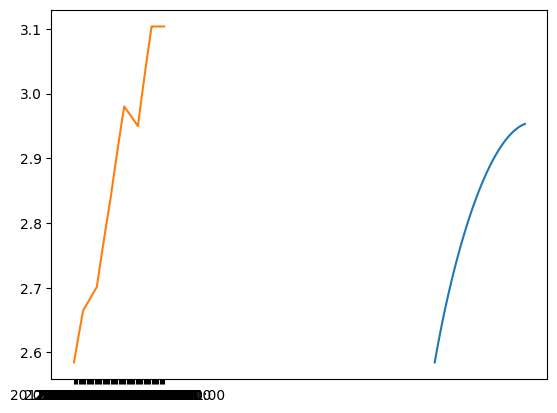

In [32]:
plt.plot(predictions1)
plt.plot(test)